In [1]:
import numpy as np
import astropy
import math
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import matplotlib
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from scipy.stats import norm
from scipy.ndimage import shift
from scipy.optimize import curve_fit
import matplotlib.path
!pip install photutils
from photutils.aperture import CircularAnnulus


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.0/857.0 kB 8.4 MB/s eta 0:00:00


In [35]:
source_NIR_560w = get_pkg_data_filename("/content/galfitoutMDR_560w_bkg_sersic_only.fits")

In [36]:
source_data_NIR = fits.getdata(source_NIR_560w)

In [37]:
mask_560w = fits.getdata("JWST_560w_mask.fits")

In [38]:
data = source_data_NIR
positions = [44,43]
aperture = CircularAnnulus(positions,r_in = 6, r_out = 18)

In [39]:
masks = aperture.to_mask(method = 'center')

In [51]:
bigmask = masks.to_image(shape = (89,89))

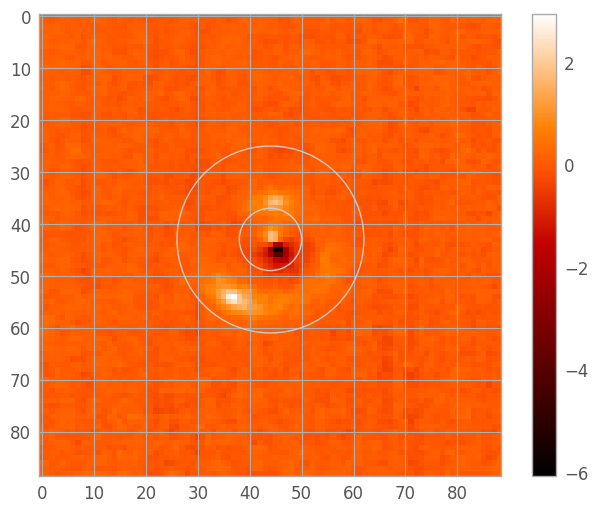

In [52]:
plt.imshow(source_data_NIR)
aperture.plot()
plt.colorbar()

In [53]:
from photutils.aperture import ApertureStats
from photutils.aperture import aperture_photometry

In [54]:
ann_stats = ApertureStats(data, aperture)
ann_stats

<photutils.aperture.stats.ApertureStats>
Length: 1

In [55]:
phot_table = aperture_photometry(data, aperture)

In [56]:
#https://photutils.readthedocs.io/en/stable/aperture.html
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'
print(phot_table)

 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1      44      43    152.94403


In [57]:
aperstats = ApertureStats(data, aperture)

In [58]:
bkg_mean = aperstats.mean

In [59]:
aperture_area = aperture.area_overlap(data)

In [60]:
total_phot = bkg_mean * aperture_area
print(total_phot)

155.1428446670908


In [61]:
aperstats.sum

152.94402547880105